# Film Distribution Data Analysis


**Research Objective:** To study the film distribution market and identify trends.

**Source Data:** 
- Data published on the Open Data Portal of the Ministry of Culture;
- The dataset includes information on distribution certificates, box office revenue, state funding for films, and data from the Kinopoisk website.

**Research Stages:**
- Data merging
- Data preprocessing
- Exploratory data analysis
- Analysis of state-funded films
- Conclusion

**Data Description:** 

The *mkrf_movies table* contains information from the distribution certificate registry. A single film may have multiple distribution certificates.

- `title` — film title;
- `puNumber` — distribution certificate number;
- `show_start_date` — film premiere date;
- `type` — film type;
- `film_studio` — production studio;
- `production_country` — production country;
- `director` — director;
- `producer` — producer;
- `age_restriction` — age rating;
- `refundable_support` — amount of refundable state support;
- `nonrefundable_support` — amount of non-refundable state support;
- `financing_source` — source of state funding;
- `budget` — total film budget. *This column already includes the full amount of state support. Data is available only for films that received state funding.*
- `ratings` — film rating on Kinopoisk;
- `genres` — film genre.

*The mkrf_shows table* contains information on film screenings in Russian cinemas.

- `puNumber` — distribution certificate number;
- `box_office` — box office revenue (in rubles).


## Merging Data into a Single DataFrame

> We merged the data in a way that ensures all records from the `mkrf_movies` dataset are included in the final DataFrame.

In [1]:
# Importing Libraries
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Formatting float output
pd.set_option('display.float_format', '{:,.2f}'.format)  

In [3]:
# Reading the dataset and saving it to a variable
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv', sep=',')  

In [4]:
# Displaying the first 10 rows
mkrf_movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [5]:
# Displaying general information about the dataset
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
# Reading the shows dataset
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv', sep=',')

In [7]:
# Displaying the first 10 rows
mkrf_shows.head(10)

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"
5,111000119,"4,293,649.51"
6,111000212,200.00
7,111000216,"355,567.00"
8,111000313,710.00
9,111000314,"1,607,970.00"


In [8]:
# Displaying general information about the dataset
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


### Preparing Data for Merging

> The datasets will be merged using the `puNumber` column. Before doing so, we need to ensure that its data type is consistent across both tables.

In [9]:
# Converting 'puNumber' to a numeric type, replacing invalid values with NaN
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors='coerce')

In [10]:
# Checking for missing values after conversion
mkrf_movies['puNumber'].isna().sum()

1

In [11]:
# Dropping rows with missing 'puNumber' values to allow type conversion
mkrf_movies = mkrf_movies.dropna(subset=['puNumber'])

In [12]:
# Converting 'puNumber' to an integer type
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')

### Merging DataFrames

> To ensure that all columns from mkrf_movies are retained in the final dataset, we will use a **left join**.

In [13]:
df = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

In [14]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


### Interim Findings

1. Changed the data type of the `puNumber` column from `object` to `int64`.
2. Merged the tables using the `puNumber` column into a single DataFrame `df`.

## Data Preprocessing

### Checking Data Types

- We check the data types in the DataFrame and convert them where necessary.

In [15]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [16]:
# Converting 'show_start_date' to datetime format
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [17]:
# Changing the 'ratings' column format to float
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce') 

In [18]:
# Converting 'box_office' to millions
df['box_office'] = df['box_office'] / 1_000_000

In [19]:
# Rounding the 'box_office' values
df['box_office'] = df['box_office'].round()

### Examining Missing Values in the DataFrame

In [20]:
# Checking for missing values in the dataset
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64

In [21]:
# Calculating the percentage of missing values and visualizing them
pd.DataFrame(round(df.isna().mean() * 100, 2)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.240000
production_country,0.030000
director,0.120000
producer,7.590000
age_restriction,0.000000
refundable_support,95.560000


> We identified missing values in four columns: `refundable_support`, `nonrefundable_support`, `budget`, and `financing_source`, all of which have 95.56% missing data. According to the documentation, the budget column contains data only for films that received government funding. Therefore, we can infer that the missing values in these columns indicate that:
> - The film did not receive government funding and was financed through alternative sources;
> - The film was produced in a different country.

> Additionally, there is 57.8% missing data in the `box_office` column. This column was sourced from a table containing information on film screenings in Russian cinemas. The missing values likely suggest that these films were not shown in Russian theaters. We will not fill in these gaps, as doing so would reduce the quality of the DataFrame.

> There are also missing values in the `producer` (7.59%), `ratings` (13.29%), and `genres` (13.03%) columns, as well as minor gaps in `production_country` (0.03%) and `director` (0.12%). However, these proportions are low and should not significantly impact the analysis.

### Duplicate Analysis in the DataFrame

In [22]:
# Checking for exact duplicate rows
df.duplicated().sum()

0

> Instead of searching for duplicates across entire rows, we focus on potential duplicates in key columns that should be unique—`title` and `puNumber`.

In [23]:
# Standardizing the title column by converting it to lowercase
df['title'] = df['title'].str.lower()

In [24]:
# Checking the number of unique values in each column
df.nunique()

title                    6761
puNumber                 7483
show_start_date          1964
type                        8
film_studio              5490
production_country        950
director                 4811
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    80
genres                    742
box_office                433
dtype: int64

> The number of unique values in `title` confirms that a single movie may have multiple distribution certificates, as stated in the documentation.

In [25]:
# Checking the number of duplicate titles
df['title'].duplicated().sum()

724

In [26]:
# Examining the most frequent titles
df['title'].value_counts().head(20)

день святого валентина_                                        5
код доступа "кейптаун"                                         4
шерлок холмс                                                   4
дорога /по новелле кормака мккарфи/                            4
не брать живым /по книге раджива чандрасекарана/               4
гарри поттер и дары смерти - часть 1/по роману дж.к.ролинг/    4
химера                                                         4
дитя тьмы                                                      4
красавчик-2                                                    4
кошмар на улице вязов /фильм ужасов/                           4
двойной копец                                                  4
робин гуд (robin hood)                                         4
безумцы                                                        4
начало_                                                        4
кошки против собак: месть китти галор                          4
прощание                 

In [27]:
# Displaying potential duplicate titles
df.loc[df['title'].duplicated(keep=False)].sort_values(by='title').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
454,100 миллионов евро,221024616,2016-05-25 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
455,100 миллионов евро,121013712,2012-06-06 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
5057,127 часов,221069011,2011-05-18 12:00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
4851,127 часов,121000811,2011-01-27 12:00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
3129,13 часов: тайные солдаты бенгази,121001016,2016-01-15 12:00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик,триллер,драма",18.00


In [28]:
# Checking the number of duplicate distribution certificate numbers
df['puNumber'].duplicated().sum()

2

In [29]:
# Displaying potential duplicate distribution certificate numbers
df.loc[df['puNumber'].duplicated(keep=False)].sort_values(by='puNumber').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5067,анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN
4637,как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4638,иоанна - женщина на папском престоле /по роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN


> **Potential explanations for duplicate `titles`:**
> 1. Different movies may share the same title (e.g., Sherlock Holmes or Good Morning).
> 2. The same movie may have been screened at different times under different distribution certificates.

> **Findings regarding duplicate `puNumber` values:**
> In two cases, the same certificate number appears twice:
> 1. The same movie with an identical premiere date but different age ratings—possibly due to a revision in the movies’s age restrictions.
> 2. Different movies with the same premiere date—likely a data entry error.

> Since removing these duplicates could compromise data integrity, we will retain them.

### Analysis of Categorical Values

- Identify common issues in categorical columns.

- Correct inconsistencies in the `type` column.

In [30]:
# Checking data types and column information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [31]:
# Reviewing the most frequent values in key categorical columns
df['film_studio'].value_counts().head(10)

Киностудия "Мосфильм"                        341
ООО "Мульт в кино"                            57
Анимаккорд Лтд                                23
ООО "Мульт в кино"                            18
ФГУП "ТПО "Киностудия "Союзмультфильм"        16
ООО "ТаББаК"                                  15
Р А И Синема                                  14
Опус Арте                                     14
ООО "Студия анимационного кино "Мельница"     14
ООО "Кинокомпания "СТВ"                       13
Name: film_studio, dtype: int64

In [32]:
df['production_country'].value_counts().head(30)

США                     2172
Россия                  1820
СССР                     347
Франция                  301
Великобритания           257
Италия                   129
Германия                 110
США - Великобритания      88
Япония                    77
Испания                   74
Франция - Бельгия         55
Канада                    52
Австралия                 50
США - Канада              44
Великобритания - США      40
КНР                       33
Республика Кипр           31
США - Франция             29
США-Австралия             29
США - Германия            29
Южная Корея               25
США - Австралия           22
Индия                     22
СССР                      20
США-Германия              19
Норвегия                  19
Дания                     18
Швеция                    15
Ирландия                  14
Украина                   14
Name: production_country, dtype: int64

In [33]:
df['director'].value_counts().head(10)

О.Семёнова          47
Стивен Содерберг    17
Д.Червяцов          17
Ридли Скотт         16
Тиль Швайгер        14
Клинт Иствуд        13
Вуди Аллен          13
Питер Джексон       13
Стивен Спилберг     12
Дэвид Финчер        12
Name: director, dtype: int64

> Many categorical columns contain inconsistencies due to variations in spelling, extra spaces, word order, or the presence/absence of quotation marks. As a result, identical values are mistakenly treated as distinct. For example, *USA - France* and *France - USA* are stored as separate categories despite referring to the same countries.

In [34]:
# Checking unique financing sources
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

> At first glance, financing sources may appear duplicated, but they are not. Some films receive funding from multiple government sources, which are listed together, separated by commas.

In [35]:
# Checking unique values in key categorical columns
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [36]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [37]:
# Removing unnecessary spaces in the 'type' column
df['type'] = df['type'].str.strip()

In [38]:
# Verifying corrections
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

### Verification of Numerical Values

> We will examine suspicious data in specific columns.

In [39]:
# Extracting a subset of columns related to funding and budget
part_df = df[['nonrefundable_support', 'budget', 'refundable_support']]
part_df[part_df.notna().any(axis=1)]  # Examining rows with non-null values in these columns

,nonrefundable_support,budget,refundable_support
1281,"26,500,000.00","79,411,900.00",0.00
1448,"26,000,000.00","37,142,857.00",0.00
1498,"107,847,945.00","176,023,490.00",0.00
1524,"28,000,000.00","40,574,140.00",0.00
1792,"25,000,000.00","40,015,122.00",0.00
...,...,...,...
7463,"400,000,000.00","980,000,000.00","100,000,000.00"
7465,0.00,"190,000,000.00","100,000,000.00"
7473,"400,000,000.00","944,000,000.00","100,000,000.00"
7475,"30,000,000.00","46,154,000.00",0.00


> The `budget` column should be the sum of `refundable_support` and `nonrefundable_support`, with potential additional funds from alternative sources (which we do not have information on). Therefore, we will verify whether the total budget follows the rule that it cannot be less than the sum of refundable and nonrefundable government support:

In [40]:
# Checking if budget is less than the sum of refundable and nonrefundable support
part_df[part_df['budget'] < part_df['refundable_support'] + part_df['nonrefundable_support']].count()

nonrefundable_support    17
budget                   17
refundable_support       17
dtype: int64

> In 17 rows, the condition is not met. **There are three possible solutions:**
> 1. Replace these cells with the sum of refundable and nonrefundable government support.
> 2. Replace with the median value.
> 3. Drop these 17 rows, as discarding them preserves the overall data quality, despite the limited number of rows with both support and revenue information. I will go with the third option.

In [41]:
# Dropping the rows where the budget is less than the sum of the support values
df = df.drop(df[df['budget'] < df['refundable_support'] + df['nonrefundable_support']].index)

### Adding New Columns

> We will create new columns to enrich the dataset with additional insights:

> 1. **Year of Release:** Extracting the year from the show_start_date column.

In [42]:
# Creating a new column with the year of release
df['show_start_year'] = pd.DatetimeIndex(df['show_start_date']).year

> 2. **Main Director and First Genre:** Extracting the first director's name and the main genre for each film.

In [43]:
# Removing rows with missing director and genre data to apply the function
df = df.dropna(subset=['director'])
df = df.dropna(subset=['genres'])

In [44]:
# Function to extract the first value from a comma-separated string
def get_first_value(s):
    values = s.split(',')
    return values[0]

In [45]:
# Creating new columns for the main director and the first genre
df['main_director'] = df['director'].apply(get_first_value)
df['first_genre'] = df['genres'].apply(get_first_value)

> 3. **State Funding as a Share of Total Budget:** Calculating the proportion of the total budget represented by government support.

In [46]:
# Calculating the share of state funding in the total budget
df['state_in_total_budget'] = df['budget'] / (df['refundable_support'] + df['nonrefundable_support'])

> Finally, let's take a look at the updated dataset:

In [47]:
# Displaying the first few rows of the dataframe
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,first_genre,state_in_total_budget
0,открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


In [48]:
# Checking the updated info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6491 entries, 0 to 7484
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6491 non-null   object        
 1   puNumber               6491 non-null   int64         
 2   show_start_date        6491 non-null   datetime64[ns]
 3   type                   6491 non-null   object        
 4   film_studio            6487 non-null   object        
 5   production_country     6490 non-null   object        
 6   director               6491 non-null   object        
 7   producer               6014 non-null   object        
 8   age_restriction        6491 non-null   object        
 9   refundable_support     300 non-null    float64       
 10  nonrefundable_support  300 non-null    float64       
 11  budget                 300 non-null    float64       
 12  financing_source       300 non-null    object        
 13  rat

 ### Interim Findings

1. We converted the data type of the `show_start_date` column from object to datetime and the `ratings` column from object to float.
2. We transformed the `box_office` column into millions and rounded the values.
3. We examined the missing values but chose not to impute them:
- In four columns—`refundable_support`, `nonrefundable_support`, `budget`, and `financing_source`—we observed 96% missing values. We hypothesized that the missing data in these columns indicates that: a. The film did not receive state funding and was financed through alternative sources; b. The film was produced in another country.
- We found 58% missing data in the `box_office` column, which we assume is due to the films not being released in Russian cinemas.
- We also observed missing values in the `producer` (8%), `ratings` (13%), and `genres` (13%) columns.
4. We identified implicit duplicates in the `puNumber` and `title` columns and explained their occurrence. We decided not to remove the duplicates.
5. We found an issue in the categorical columns, where identical information was duplicated as unique values.
6. We corrected the problematic values in the `type` column.
7. We discovered anomalous values in the `budget` column and cleaned the dataframe by removing rows where the budget was less than the sum of refundable and non-refundable support.
8. We created four new columns: `show_start_year` (year of release), `main_director` (the main director's name), `first_genre` (the primary genre of the film), and `state_in_total_budget` (the share of government funding in the total budget).

 ## Exploratory Data Analysis (EDA)

- Let’s examine how many films were released each year. *Box office data is not available for all films.*
- Using a pivot table, we will calculate the average and median box office revenue for each year.

In [49]:
movies_per_year = df.pivot_table(index='show_start_year',
                                 values='box_office',
                                 aggfunc = ['count', 'sum', 'mean', 'median'])
# Create a pivot table
movies_per_year.columns = ['count_movies_per_year',
                           'sum_box_office', 'mean_box_office', 'median_box_office']

movies_per_year.head(10)

,count_movies_per_year,sum_box_office,mean_box_office,median_box_office
show_start_year,,,,
2010,102,1.00,0.01,0.00
2011,104,1.00,0.01,0.00
2012,123,4.00,0.03,0.00
2013,180,26.00,0.14,0.00
2014,262,"7,297.00",27.85,0.00
2015,413,"37,168.00",90.00,7.00
2016,461,"44,673.00",96.90,5.00
2017,330,"46,007.00",139.42,10.50
2018,441,"46,413.00",105.24,10.00


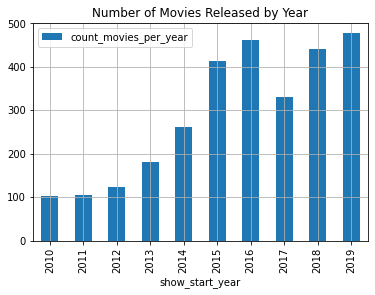

In [50]:
movies_per_year['count_movies_per_year'].plot(kind='bar', 
                                              legend=True, 
                                              grid=True,
                                              title = 'Number of Movies Released by Year');

> The number of movies released steadily increased from 2010 to 2016, with a decline in 2017, followed by a recovery in 2019, surpassing the previous levels.

- Next, let’s calculate the proportion of films with available box office data.

In [51]:
display('Proportion of films with box office information:',
        df['box_office'].count() / df['show_start_year'].count())

'Proportion of films with box office information:'

0.4456940378986289

- We’ll explore the box office revenue trends by year: a) In which year was the revenue the lowest? b) In which year was it the highest?

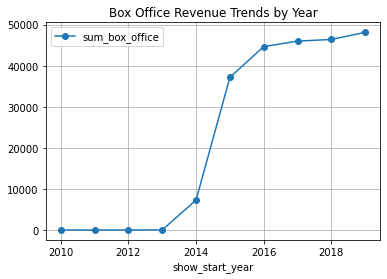

In [52]:
movies_per_year['sum_box_office'].plot(style='o-', 
                                       legend=True, 
                                       grid=True,
                                       title = 'Box Office Revenue Trends by Year');

> From 2013, the box office revenue started to grow steadily. The graph does not distinguish small changes, so we refer to the pivot table above. The lowest revenue was recorded in 2011, and the highest in 2019.

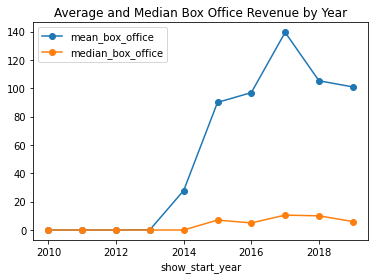

In [53]:
movies_per_year.plot(style='o-', y=['mean_box_office', 'median_box_office'],
                     title= 'Average and Median Box Office Revenue by Year');

> The average and median values differ significantly. We hypothesize that this is due to a large number of outliers in the data.

In [54]:
df[['box_office']].describe()

,box_office
count,"2,893.00"
mean,79.41
std,245.81
min,0.00
25%,0.00
50%,3.00
75%,28.00
max,"3,074.00"


We will determine whether age restrictions (such as "6+", "12+", "16+", "18+", etc.) affect a film's box office revenue from 2015 to 2019. Specifically, we’ll answer the following questions:
1. Which age restriction category generated the most revenue?
2. Does this change over the years?

In [55]:
age_box_office = df.pivot_table(index='show_start_year',
                                columns='age_restriction',
                                values='box_office',
                                aggfunc='sum')
age_box_office.tail()

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2015,328.00,"13,419.00","10,469.00","5,272.00","7,680.00"
2016,77.00,"11,135.00","15,887.00","6,764.00","10,810.00"
2017,228.00,"7,350.00","17,788.00","9,619.00","11,022.00"
2018,4.00,"12,473.00","15,284.00","8,743.00","9,909.00"
2019,14.00,"12,665.00","12,715.00","10,074.00","12,678.00"


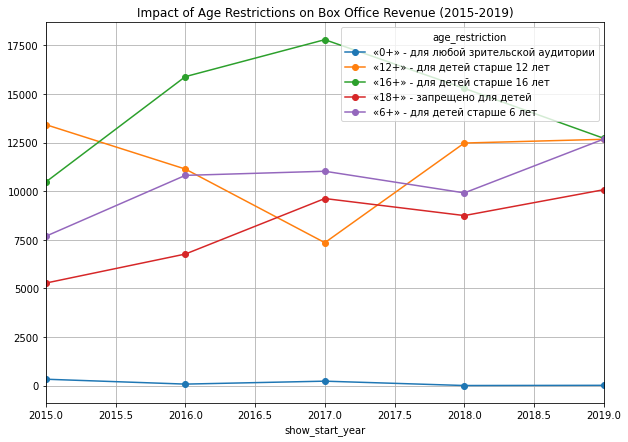

In [56]:
age_box_office.plot(style='o-', 
                    xlim=[2015, 2019],
                    figsize=(10, 7),
                    grid = True,
                    title='Impact of Age Restrictions on Box Office Revenue (2015-2019)');

> Age restrictions clearly influence box office revenue: films with the "16+" rating earn the most, while "0+" films earn the least (most likely due to the fact that this category only includes animated movies for young children, which are rarely watched in theaters).

> We also observe the following trends:
> - Box office revenue for "18+" films roughly doubled during the period.
> - "6+" films saw a revenue increase of around 40%.
> - "12+" films experienced a sharp drop in 2017 but recovered by 2019.
> - "0+" films saw a massive drop from 327 million in 2015 to 13 million in 2019.

In [57]:
age_pivot = df.pivot_table(index='age_restriction',
                                values='box_office',
                                aggfunc='sum')
age_pivot.columns = ['sum_box_office']
age_pivot

,sum_box_office
age_restriction,
«0+» - для любой зрительской аудитории,"1,027.00"
«12+» - для детей старше 12 лет,"59,643.00"
«16+» - для детей старше 16 лет,"72,574.00"
«18+» - запрещено для детей,"42,686.00"
«6+» - для детей старше 6 лет,"53,806.00"


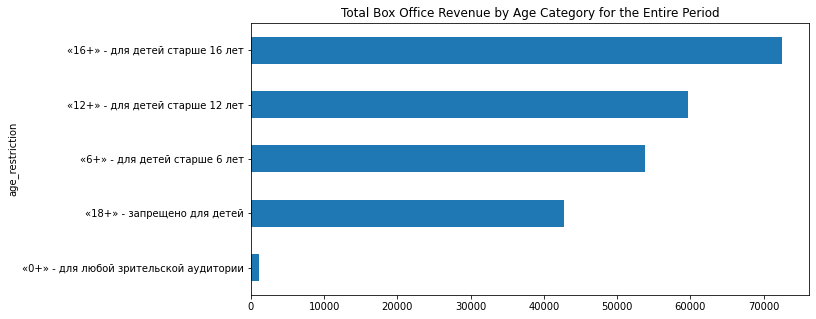

In [58]:
age_pivot.sort_values(by = 'sum_box_office')\
    .plot(kind='barh', title = 'Total Box Office Revenue by Age Category for the Entire Period',
         figsize = (10,5),
         legend = None)
plt.show()

### Interim Findings

1. The number of films released steadily increased from 2010 to 2016, with a decline in 2017, but by 2019, it had surpassed previous levels.
2. The proportion of films with available box office data is 0.44.
3. We analyzed box office trends by year: since 2013, box office earnings have been steadily growing. The lowest revenue was recorded in 2011, while the highest was in 2019.
4. We found that the average and median values differ significantly, which we believe is due to a large number of outliers.
5. We concluded that age restrictions influence box office revenue: films rated "16+" earned the most, while "0+" films earned the least.

## Analysis of Films Receiving Government Support

### Distribution of Government Funding Over the Years

In [59]:
# Calculate the total amount of state support
df['state_support'] = df['refundable_support'] + df['nonrefundable_support']

In [60]:
# Convert values to millions for better readability
df['state_support'] = df['state_support'] / 1_000_000  

In [61]:
# Round values for clarity
df['state_support'] = df['state_support'].round()

In [62]:
year_support = df.pivot_table(index='show_start_year',
                              values='state_support',
                              aggfunc=['count', 'sum', 'mean', 'median'])

year_support.columns = ['state_support_cases', 'sum_state_support', 
                        'mean_state_support', 'median_state_support']
year_support

,state_support_cases,sum_state_support,mean_state_support,median_state_support
show_start_year,,,,
2010,0,0.00,NaN,NaN
2011,0,0.00,NaN,NaN
2012,0,0.00,NaN,NaN
2013,2,134.00,67.00,67.00
2014,14,523.00,37.36,28.00
2015,77,"3,129.00",40.64,30.00
2016,54,"3,828.00",70.89,35.00
2017,37,"3,049.00",82.41,40.00
2018,50,"2,983.00",59.66,37.50


#### Number of Films Receiving Government Support by Year

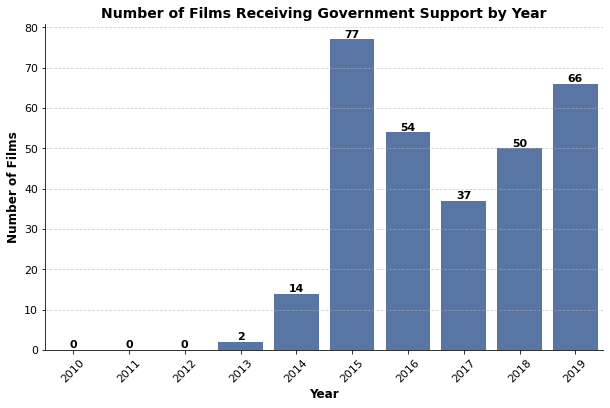

In [63]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=year_support.index, 
    y=year_support['state_support_cases'], 
    color='#4C72B0'
)

plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title('Number of Films Receiving Government Support by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Films', fontsize=12, fontweight='bold')

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()),  
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )

sns.despine(top=True, right=True)

plt.show()

> - Only films released between 2013 and 2019 received government support.
> - The highest number of funded films (77) was released in 2015.

#### Total Government Funding by Year

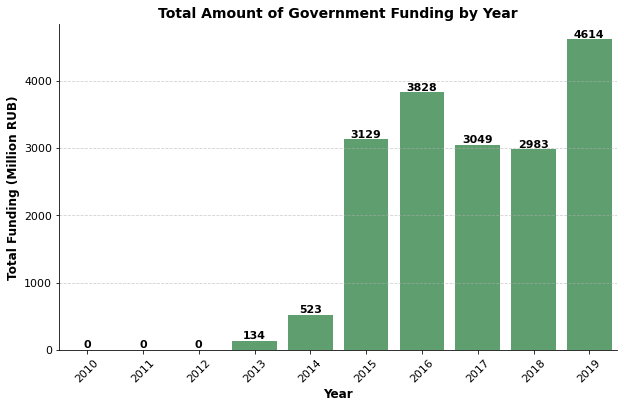

In [64]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=year_support.index, 
    y=year_support['sum_state_support'], 
    color='#55A868'
)

plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title('Total Amount of Government Funding by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Funding (Million RUB)', fontsize=12, fontweight='bold')

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2, p.get_height()),  
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )

sns.despine(top=True, right=True)

plt.show()

> - The highest total government funding was allocated to films released in 2019 (4.6B RUB). In contrast, although more films were funded in 2015, the funding amounts per film were smaller.

#### Median Government Funding per Film by Year

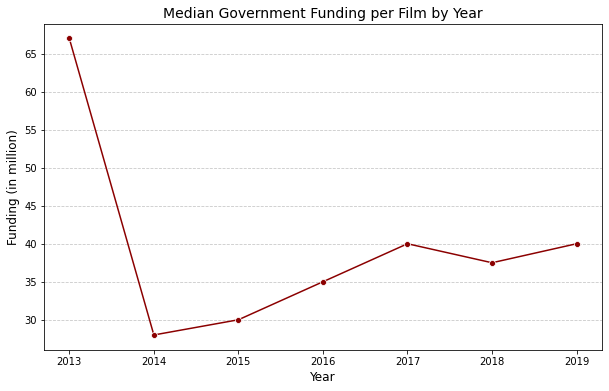

In [65]:
plt.figure(figsize=(10,6))
sns.lineplot(x=year_support.index, y=year_support['median_state_support'], marker='o', color='darkred')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Median Government Funding per Film by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Funding (in million)', fontsize=12)
plt.show()

> - In 2015, the highest number of films received government subsidies, resulting in an average of approximately 30 million per film.
> - The highest government funding per film was observed in 2013, when only two films were supported.

### Government Funding by Genre

In [66]:
genre_support = df.pivot_table(index='first_genre',
                                 values='state_support',
                                 aggfunc = ['count','median'])
genre_support.columns = ['count_genre', 'median_support']
genre_support.sort_values('count_genre', ascending=False).style.background_gradient('coolwarm')

,count_genre,median_support
first_genre,,
драма,92,30.000000
комедия,68,32.500000
мультфильм,26,60.000000
триллер,14,37.500000
мелодрама,14,28.000000
фэнтези,11,34.000000
ужасы,10,30.000000
фантастика,10,27.500000
военный,9,45.000000


> - Historical films receive the highest funding per project, while children's films receive the lowest.

#### Number of Films Receiving Government Support by Genre

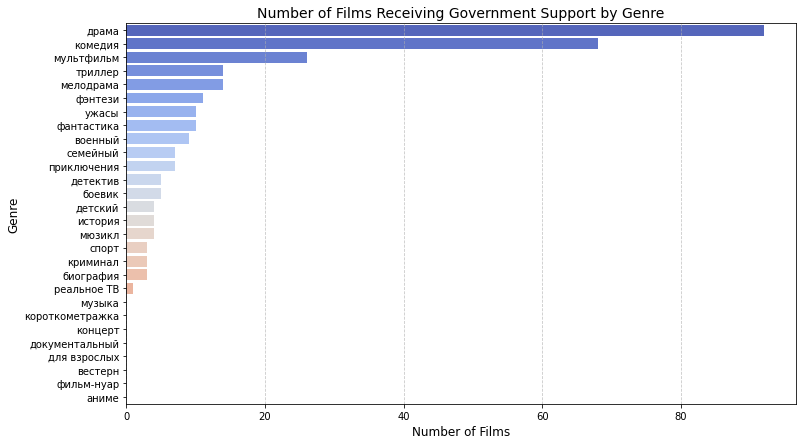

In [81]:
genre_support_sorted = genre_support.sort_values(by='count_genre', ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(y=genre_support_sorted.index, x=genre_support_sorted['count_genre'], palette='coolwarm')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title('Number of Films Receiving Government Support by Genre', fontsize=14)
plt.xlabel('Number of Films', fontsize=12)
plt.ylabel('Genre', fontsize=12)

plt.show()

> - Drama and comedy receive government support most frequently.
> - *Surprisingly, short films are not among the funded genres, despite frequent government-backed festivals and contests.*

### Movie Payback Analysis

In [68]:
movies_payback = df.pivot_table(index='first_genre',
                                values=['box_office', 'state_support'],
                                aggfunc='median')

movies_payback.columns = ['median_box_office', 'median_state_support']

movies_payback.sort_values('median_box_office', ascending=False).style.background_gradient('coolwarm')

,median_box_office,median_state_support
first_genre,,
спорт,86.000000,40.000000
реальное ТВ,33.000000,53.000000
фантастика,27.000000,27.500000
детектив,14.000000,55.000000
боевик,11.000000,35.000000
ужасы,10.000000,30.000000
мюзикл,9.000000,37.500000
биография,9.000000,28.000000
военный,7.500000,45.000000


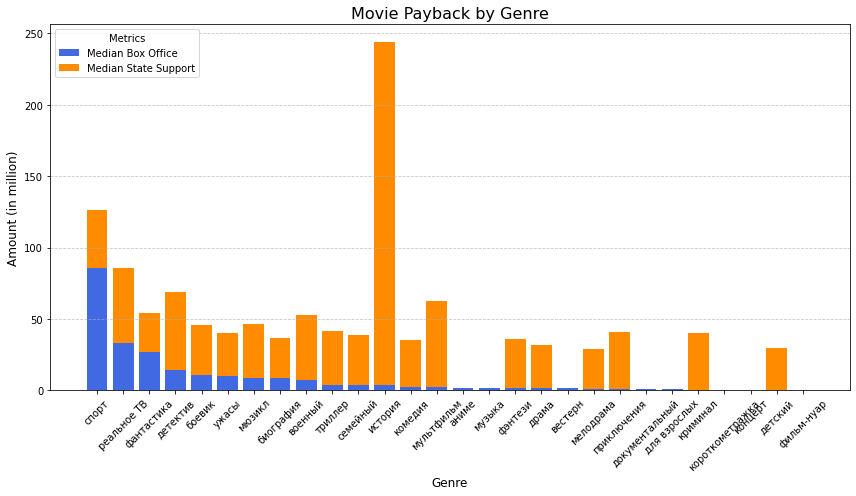

In [69]:
movies_payback_sorted = movies_payback.sort_values('median_box_office', ascending=False)

plt.figure(figsize=(12, 7))

plt.bar(movies_payback_sorted.index, movies_payback_sorted['median_box_office'], 
        color='royalblue', label='Median Box Office')

plt.bar(movies_payback_sorted.index, movies_payback_sorted['median_state_support'], 
        bottom=movies_payback_sorted['median_box_office'], color='darkorange', label='Median State Support')

plt.title('Movie Payback by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Amount (in million)', fontsize=12)

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Metrics')

plt.tight_layout()

plt.show()

> - **Top 3 most profitable genres:** Sports, Reality TV, and Sci-Fi.
> - **Most unprofitable genre:** Kids.

### Dependence of Government Funding on Age Categories

In [70]:
age_restriction_support = df.pivot_table(index='age_restriction',
                                 values='state_support',
                                 aggfunc = ['count','median'])
age_restriction_support.columns = ['count_cases', 'median_support']
age_restriction_support.sort_values('count_cases', ascending=False).style.background_gradient('coolwarm')

,count_cases,median_support
age_restriction,,
«16+» - для детей старше 16 лет,114,30.000000
«12+» - для детей старше 12 лет,96,44.000000
«6+» - для детей старше 6 лет,58,45.000000
«18+» - запрещено для детей,25,30.000000
«0+» - для любой зрительской аудитории,7,25.000000


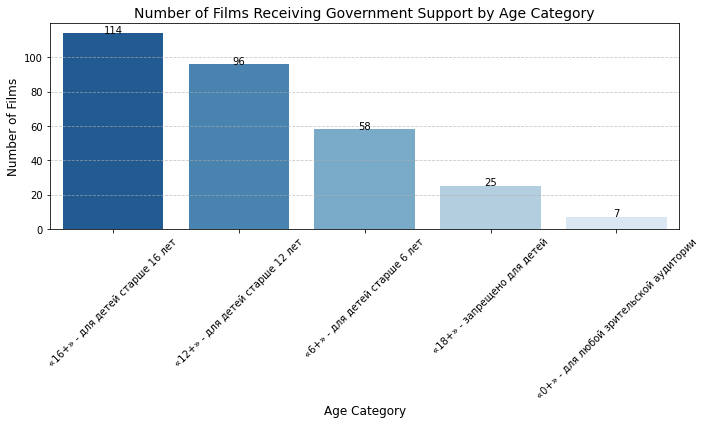

In [71]:
age_restriction_support_sorted = age_restriction_support.sort_values('count_cases', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x=age_restriction_support_sorted.index, 
            y=age_restriction_support_sorted['count_cases'], 
            palette='Blues_r')

plt.title('Number of Films Receiving Government Support by Age Category', fontsize=14)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Number of Films', fontsize=12)

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(age_restriction_support_sorted)):
    plt.text(i, age_restriction_support_sorted['count_cases'].iloc[i] + 0.2, 
             f'{age_restriction_support_sorted["count_cases"].iloc[i]:,.0f}', 
             ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

> - **Most supported age category:** 16+ films.
> - **Least supported:** 0+ films, and they receive the smallest amount of funding..

### Correlation between Government Funding and Movie Rating

In [72]:
rating_corr = df.pivot_table(index='ratings', values=['state_support'], aggfunc = ['count', 'median'])
rating_corr.columns = ['count_rating', 'median_state_support']
rating_corr.sort_values('count_rating', ascending=False).style.background_gradient('coolwarm')

,count_rating,median_state_support
ratings,,
6.2,21,30.000000
5.8,16,40.000000
6.6,15,35.000000
6.3,14,26.000000
6.7,14,34.500000
6.1,13,30.000000
6.5,10,45.000000
6.9,10,60.000000
6.8,10,57.500000


In [73]:
df['ratings'].corr(df['state_support'])

0.12467214318922078

> - **Most common rating for supported films:** 6.2
> - **The film receiving the highest government funding** has a rating of 3.0.
> - There is **a weak positive correlation (0.12)** between movie ratings and government funding, which indicates only a slight relationship. This means that, the amount of government funding a film receives does not strongly depend on its rating.

### Analysis of Funding Sources

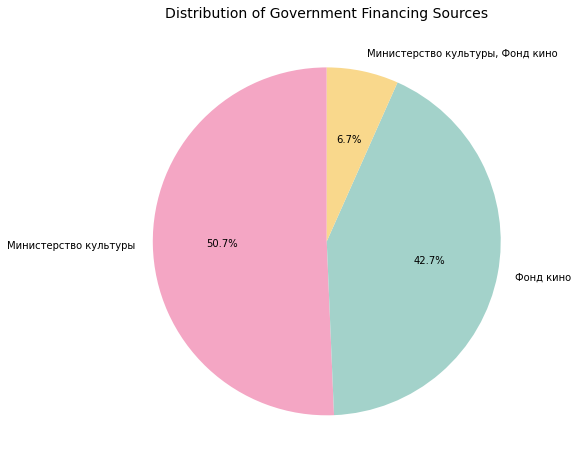

In [74]:
source_value_counts = df['financing_source'].value_counts()

plt.figure(figsize=(8, 8))
source_value_counts.plot(kind='pie', autopct='%1.1f%%', legend=False, 
                         colors=['#F4A6C4', '#A3D2CA', '#F9D88C', '#A9C4E0', '#F6B0C4'],
                         startangle=90, wedgeprops={'edgecolor': 'none'})
plt.title('Distribution of Government Financing Sources', fontsize=14)
plt.ylabel('')
plt.show()

> - Half of all funding comes from **the Ministry of Culture.**

In [75]:
source_support = df.pivot_table(index='financing_source',
                                 values='state_support',
                                 aggfunc = ['count', 'sum', 'mean', 'median'])
source_support.columns = ['financing_source_cases',
                           'sum_financing_source', 'mean_financing_source', 'median_financing_source']
source_support

,financing_source_cases,sum_financing_source,mean_financing_source,median_financing_source
financing_source,,,,
Министерство культуры,152,"4,491.00",29.55,28.00
"Министерство культуры, Фонд кино",20,"1,107.00",55.35,48.00
Фонд кино,128,"12,662.00",98.92,60.00


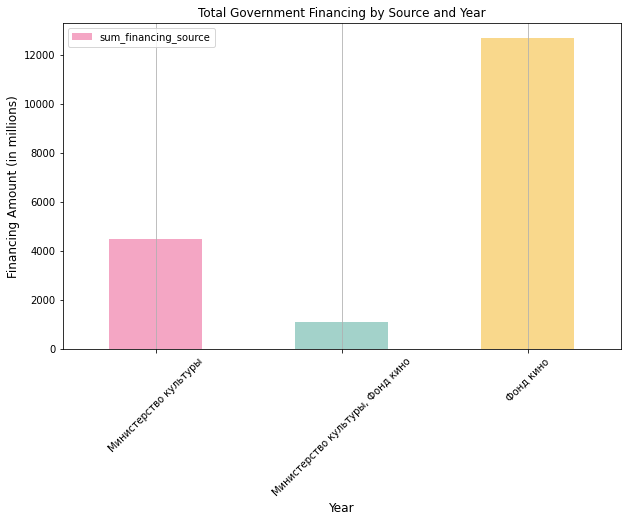

In [76]:
plt.figure(figsize=(10,6))
source_support['sum_financing_source'].plot(kind='bar', 
                                              legend=True, 
                                              grid=True, 
                                              color=['#F4A6C4', '#A3D2CA', '#F9D88C', '#A9C4E0', '#F6B0C4'],
                                              title = 'Total Government Financing by Source and Year')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Financing Amount (in millions)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> - The largest amount of funding comes from **the Film Foundation**, but the Ministry of Culture finances more films.

### Comparing Russian Films with and without Government Support

- To evaluate the effectiveness of government support, we will split the dataset into two dataframes: one for Russian films that received government support and another for those that did not. Then, we will compare these films in terms of their ratings and box office revenues.

In [77]:
with_support = df[(df['production_country'] == 'Россия') & (df['budget'] >= 0)]
with_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,first_genre,state_in_total_budget,state_support
1281,пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"79,411,900.00",Министерство культуры,8.10,"драма,мелодрама",0.00,2013,А.Атанесян,драма,3.00,26.00
1498,невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"176,023,490.00",Фонд кино,5.30,"комедия,фантастика",20.00,2013,Р.Давлетьяров,комедия,1.63,108.00
1524,берцы,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,"40,574,140.00",Министерство культуры,4.20,драма,0.00,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,1.45,28.00
1792,братья ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,"40,015,122.00",Министерство культуры,6.40,драма,0.00,2014,М.Угаров,драма,1.60,25.00
1853,тайна сухаревой башни. чародей равновесия,114000115,2015-02-18 12:00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,...,"51,850,000.00",Министерство культуры,6.10,"мультфильм,фэнтези,история",15.00,2015,С.Серегин,мультфильм,2.07,25.00


In [78]:
without_support = df[(df['production_country'] == 'Россия')]
without_support['budget'].isna()
without_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,first_genre,state_in_total_budget,state_support
336,каникулы строгого режима,111008514,2014-08-07 12:00:00,Художественный,"ООО ""Кинобазза"" по заказу ЗАО ""Дирекция Кино""",Россия,И.Зайцев,"А.Максимов, Н.Попов, Д.Файзиев",«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,7.10,"драма,комедия,приключения",0.00,2014,И.Зайцев,драма,NaN,NaN
462,август. восьмого,111000612,2012-02-07 12:00:00,Художественный,"ЗАО ""ПК ""ГЛАВКИНО""",Россия,Д.Файзиев,"Д.Файзиев, Ф.Бондарчук, И.Бачурин",«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,6.10,"драма,военный",0.00,2012,Д.Файзиев,драма,NaN,NaN
463,тот еще...!,111001612,2012-02-20 12:00:00,Художественный,"ООО ""Энджой мувиз""",Россия,С.Андреасян,Г.Малков,«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,2.60,"фэнтези,комедия,семейный",0.00,2012,С.Андреасян,фэнтези,NaN,NaN
464,кококо,111003112,2012-06-05 12:00:00,Художественный,"ООО Кинокомпания ""Глобус-фильм""",Россия,А.Смирнова,С.Сельянов,«18+» - запрещено для детей,NaN,...,NaN,NaN,6.90,"драма,комедия",0.00,2012,А.Смирнова,драма,NaN,NaN
469,разговор,111000712,2012-02-07 12:00:00,Художественный,"ООО ""Кинокомпания ""КВФильм-Продакшн"", ООО ""Ком...",Россия,"В.Иванов, С.Комаров",В.Карев,«16+» - для детей старше 16 лет,NaN,...,NaN,NaN,7.60,"триллер,драма,детектив",NaN,2012,В.Иванов,триллер,NaN,NaN


In [79]:
with_support_pivot = with_support.pivot_table(index = 'production_country',
                                              values = ['ratings','box_office'],
                                                    aggfunc = ['median', 'mean'])
with_support_pivot

median               mean        
                   box_office ratings box_office ratings
production_country                                      
Россия                  17.00    6.20     134.33    6.00

In [80]:
without_support_pivot = without_support.pivot_table(index = 'production_country',
                                              values = ['ratings','box_office'],
                                                    aggfunc = ['median', 'mean'])
without_support_pivot

median               mean        
                   box_office ratings box_office ratings
production_country                                      
Россия                   1.00    6.30      70.17    6.12

> - **Box Office Performance:** Films with government support tend to have much higher box office earnings, especially when considering the mean value, which is much larger than that for films without support.
> - **Ratings:** The ratings of films with and without government support are fairly close, with a slight advantage for films without support at the median. However, the difference in ratings is relatively small, suggesting that government support does not have a major impact on how audiences rate the films.
> - Additionally, it is possible that films with government support benefit from easier marketing and promotion. Government-backed films may receive more attention, better distribution channels, and greater visibility, which could contribute to their higher box office performance. This marketing advantage might explain the higher revenue, even though the ratings between supported and non-supported films are quite similar.

### Interim Findings

1. **Creation of `state_support` Column:** We combined the amounts of both non-refundable and refundable government support into a single column.

2. **Analysis of Government Budget Distribution by Year:**
- Only films released between 2013 and 2019 received government support. The highest number of funded films (77) were released in 2015.
- The largest total government funding was allocated to films released in 2019. This suggests that while more films were funded in 2015, the funding per film was lower.
- The highest number of government-supported films came out in 2015, but the highest funding per film was recorded in 2013 when only two films were subsidized.

3. **Genre-Based Government Funding Trends:**
- The most frequently funded genres are **drama** and **comedy**.
- However, **historical films** receive the largest total funding, while **children’s films** receive the least.

4. **Profitability Analysis of Government-Funded Films:**
- The top 3 most profitable genres are **sports, reality TV, and sci-fi**.
- The least profitable genre is **children’s films**.

5. **Funding Distribution by Age Category:**
- Films rated **16+** receive government support most often.
- Films rated **0+** receive the least government funding.

6. **Correlation Between Movie Ratings and Government Funding:**
- The most common rating for supported films is **6.2**.
- The film that received the highest government funding has a rating of **3.0**.
- There is **a weak positive correlation (0.12)** between movie ratings and government funding, meaning that while some relationship exists, the amount of funding a film receives does not strongly depend on its rating.

7. **Analysis of Funding Sources:**
- The **largest total funding** comes from **the Cinema Fund**.
- However, **the Ministry of Culture** is the most frequent financier, supporting **50.7%** of all funded films.

8. **Comparison of Films With and Without Government Support:**
- Films with government support have **higher box office earnings**, both in terms of mean and median values.
- However, **films without government support have a slightly higher average rating**.

## Overall Conclusion

The study examined the characteristics of Russian films, focusing on data preprocessing, exploratory data analysis (EDA), and the impact of government funding on box office performance and ratings.

**Key Findings:**
1. **Data Preprocessing and Cleaning:**
- The dataset was consolidated into a single DataFrame, and various data types were adjusted for accuracy.
- Missing values were analyzed, particularly in funding-related columns, revealing that many films were either privately financed or produced outside Russia.
- Duplicate and anomalous values were identified and handled, ensuring data consistency.

2. **General Film Industry Trends:**
- The number of films released steadily increased from 2010 to 2016, with a temporary decline in 2017 before surpassing previous levels by 2019.
- Box office revenue has been growing since 2013, with the highest earnings recorded in 2019.
- Age restrictions influence box office success, with 16+ films generating the most revenue and 0+ films the least.

3. **Government Support and Its Impact:**
- **Funding trends:** Government support was only provided between 2013 and 2019, with the highest number of supported films released in 2015. However, the largest total funding was allocated to films released in 2019.
- **Genre preferences:** The most commonly supported genres were drama and comedy, but historical films received the highest funding, while children’s films received the least.
- **Profitability:** The most profitable government-funded genres were sports, reality TV, and sci-fi, whereas children’s films were the least profitable.
- **Age categories:** Films rated 16+ received the most government support, while 0+ films were supported the least.
- **Funding sources:** The Cinema Fund provided the largest total funding, but the Ministry of Culture financed the highest number of films (50.7%).

4. **Box Office and Ratings Comparison (With vs. Without Government Support):**
- Films with government support had significantly higher box office earnings (both mean and median).
- However, films without government support had slightly higher average ratings, suggesting that government funding primarily aids in box office performance rather than improving audience reception.
- A weak positive correlation (0.12) between government funding and ratings suggests that funding has little impact on film ratings.

5. **Possible Explanation for the Box Office Boost in Supported Films:**
- One potential reason why government-backed films achieve higher box office earnings could be their greater access to marketing and promotion, making them more visible to audiences.

**Final Thought:**
Government funding plays a crucial role in the Russian film industry, primarily influencing the financial success of films rather than their perceived quality. While it helps certain genres thrive and boosts overall box office revenue, it does not necessarily correlate with higher audience ratings.